In [22]:
import numpy as np
import pandas as pd
import tensorflow as tf
import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix


In [ ]:
gpu=tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu[0],True)

In [3]:
path1=glob.glob('SAMPLE_F/*')
path2=glob.glob('SAMPLE_w/*')

In [4]:
x=[]
y=[]

In [5]:
for i in path1:
    df=pd.read_csv(i)
    dataset=df.iloc[:,1:].values
    x.append(dataset)
    y.append(1)

In [6]:
for i in path2:
    df=pd.read_csv(i)
    dataset=df.iloc[:,1:].values
    for i in range(0,len(dataset),15):
        if i+15>len(dataset):break
        x.append(dataset[i:15+i])
        y.append(0)

In [7]:
x=np.array(x)

In [ ]:
x.shape

In [8]:
y=np.array(y)
y.shape

(770,)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
model  = Sequential()
model.add(LSTM(units = 102, return_sequences = True, input_shape = (15, 51)))
model.add(Dropout(0.2))
model.add(LSTM(units = 102, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 51, return_sequences = True))
# model.add(Dropout(0.2))
model.add(LSTM(units = 51,return_sequences= False))
model.add(Dropout(0.1))
model.add(Dense(units = 1, activation="sigmoid"))
model.compile(optimizer="adam", metrics = ['accuracy'], loss = "binary_crossentropy")
model.fit(x_train,y_train,epochs=100,batch_size=51,validation_data=(x_test,y_test))

In [ ]:
res=model.predict(x_test)


In [ ]:
np.argmax(res[3])

In [ ]:
np.argmax(y_test[3])

In [ ]:
model.save('weight_pose.h5')

In [ ]:
model.summary()

FINAL

In [2]:
gpu=tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu[0],True)
path1=glob.glob('SAMPLE_F/*')
path2=glob.glob('SAMPLE_w/*')
x=[]
y=[]

for i in path1:
    df=pd.read_csv(i)
    dataset=df.iloc[:,1:].values
    x.append(dataset)
    y.append(1)

for i in path2:
    df=pd.read_csv(i)
    dataset=df.iloc[:,1:].values
    for i in range(0,len(dataset),15):
        if i+15>len(dataset):break
        x.append(dataset[i:15+i])
        y.append(0)
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model  = Sequential()
model.add(LSTM(units = 102, return_sequences = True, input_shape = (15, 51)))
model.add(Dropout(0.2))
model.add(LSTM(units = 102, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 51, return_sequences = True))
# model.add(Dropout(0.2))
model.add(LSTM(units = 51,return_sequences= False))
model.add(Dropout(0.1))
model.add(Dense(units = 1, activation="sigmoid"))
model.compile(optimizer="adam", metrics = ['accuracy'], loss = "binary_crossentropy")
model.fit(x_train,y_train,epochs=50,batch_size=51,validation_data=(x_test,y_test))
model.save('weight_pose.h5')

Epoch 1/50
13/13 [==============================] - 11s 136ms/step - loss: 0.6273 - accuracy: 0.6445 - val_loss: 0.4633 - val_accuracy: 0.8052
Epoch 2/50
13/13 [==============================] - 0s 18ms/step - loss: 0.3142 - accuracy: 0.8896 - val_loss: 0.1999 - val_accuracy: 0.9286
Epoch 3/50
13/13 [==============================] - 0s 18ms/step - loss: 0.1773 - accuracy: 0.9481 - val_loss: 0.1001 - val_accuracy: 0.9675
Epoch 4/50
13/13 [==============================] - 0s 18ms/step - loss: 0.0907 - accuracy: 0.9708 - val_loss: 0.1087 - val_accuracy: 0.9675
Epoch 5/50
13/13 [==============================] - 0s 18ms/step - loss: 0.0894 - accuracy: 0.9789 - val_loss: 0.0919 - val_accuracy: 0.9675
Epoch 6/50
13/13 [==============================] - 0s 17ms/step - loss: 0.0820 - accuracy: 0.9740 - val_loss: 0.2374 - val_accuracy: 0.9286
Epoch 7/50
13/13 [==============================] - 0s 17ms/step - loss: 0.0853 - accuracy: 0.9708 - val_loss: 0.0582 - val_accuracy: 0.9805
Epoch 8/50


In [12]:
model = keras.models.load_model('weight_pose.h5')

In [3]:
res=model.predict(x_test)


5/5 [==============================] - 1s 5ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

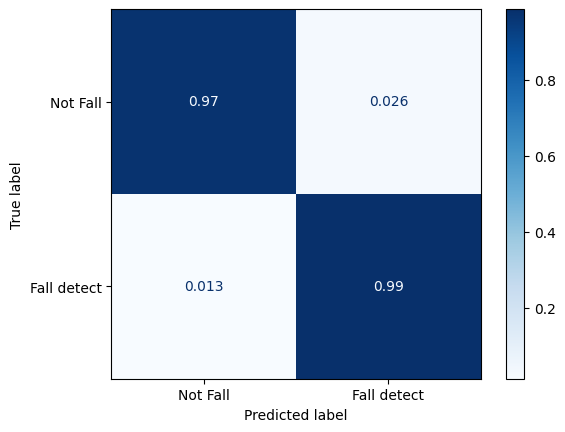

In [25]:
cm=confusion_matrix(y_true=y_test,y_pred=np.around(res),normalize='true')
disp=ConfusionMatrixDisplay(cm,display_labels=['Not Fall','Fall detect'])
disp.plot(cmap=plt.cm.Blues)
plt.show